In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
gnd_data = pd.read_csv("../data/full_gnd_emolex.csv")

In [34]:
gnd_data.columns

Index(['id_str', 'created_at', 'full_text', 'retweet_count', 'favorite_count',
       'user_id', 'screen_name', 'name', 'location', 'negative', 'positive',
       'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness',
       'surprise', 'trust'],
      dtype='object')

In [35]:
emotions = ["positive", "joy", "trust", "surprise", "anticipation", "negative", "anger", "disgust", "fear", "sadness"]

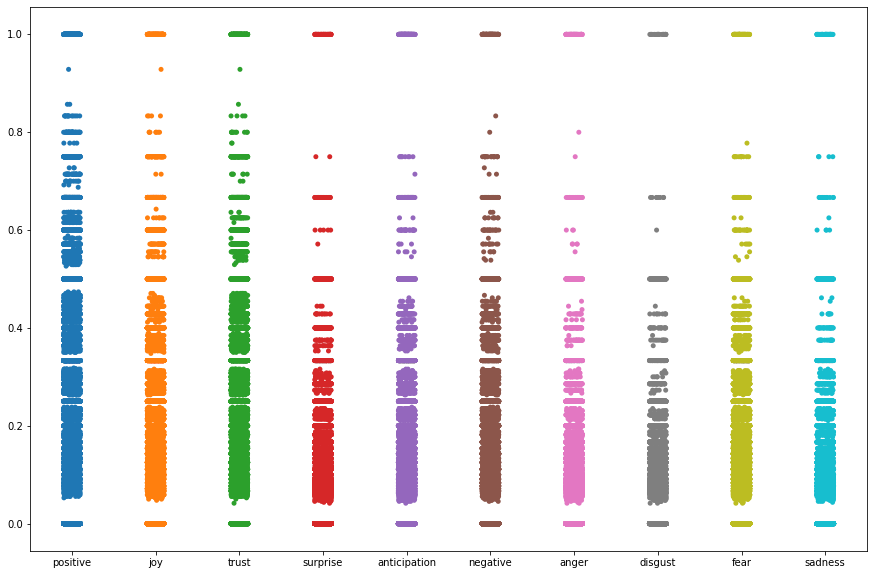

In [36]:
plt.figure(figsize=(15,10))
sns.stripplot(data = gnd_data[emotions])
plt.show()

In [65]:
gnd_topic_2_words = ["explain", "implement", "solution", "lead", "reduce"]
gnd_topic_2 = gnd_data[gnd_data["full_text"].str.contains("explain|implement|solution|lead|reduce", na=False)]
gnd_topic_2.head(3)

,id_str,created_at,full_text,retweet_count,favorite_count,user_id,screen_name,name,location,negative,positive,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,topic_2
20,1029786822145204224,Wed Aug 15 17:48:05 +0000 2018,great thread from explains why this proposal w...,2,2,252736039,GreenJobsNY,Stephan Edel,"Holyoke, MA, United States",0.0,0.00,0.0,0.00,0.0,0.111111,0.0,0.0,0.00,0.00,0
63,1032547741614915585,Thu Aug 23 08:39:00 +0000 2018,the green new deal - written in 2008 by colin...,90,131,83567424,AnnPettifor,Ann Pettifor,London,0.0,0.75,0.0,0.25,0.0,0.000000,0.5,0.0,0.25,0.75,0
93,1034582836949540865,Tue Aug 28 23:25:44 +0000 2018,prairiepundit: the climate change solutions wo...,0,0,28812827,PrairiePundit,Merv Benson,"Washington, Texas",0.0,0.00,0.0,0.00,0.0,0.250000,0.0,0.0,0.00,0.00,0


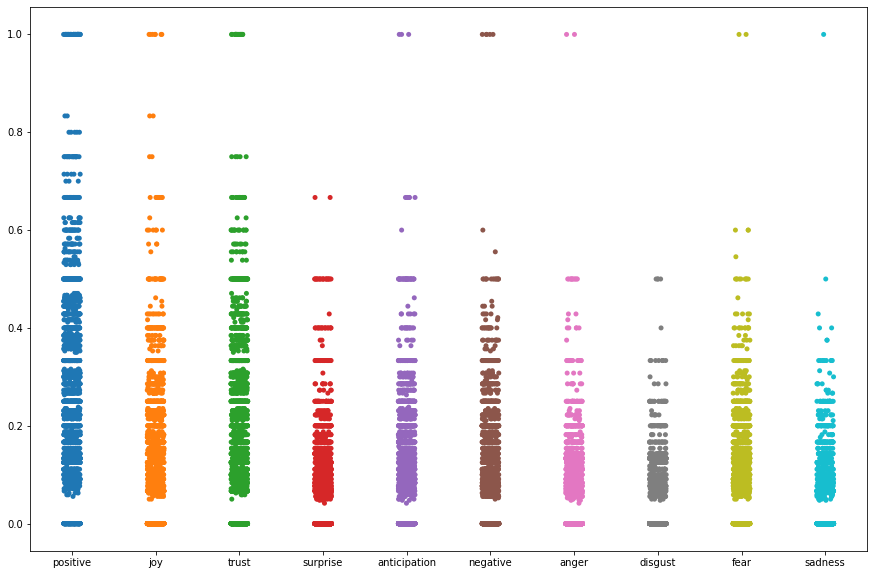

In [66]:
plt.figure(figsize=(15,10))
sns.stripplot(data = gnd_topic_2[emotions])
plt.show()

In [64]:
gnd_topic_3_words = ["panelsnotpipeline", "cdnpoli"]
gnd_topic_3 = gnd_data[gnd_data["full_text"].str.contains("panelsnotpipeline|cdnpoli", na=False)]
gnd_topic_3.head(3)

,id_str,created_at,full_text,retweet_count,favorite_count,user_id,screen_name,name,location,negative,positive,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,topic_2
89,1034269110421487616,Tue Aug 28 02:39:06 +0000 2018,tesla wins case against ontario government ove...,0,0,744559800877342730,GonnaFry,Eve O Destruction,"Alberta, Canada",0.500000,0.250000,0.000000,0.0,0.0,0.500000,0.250000,0.250000,0.25,0.000000,1
219,1041466889396994048,Sun Sep 16 23:20:30 +0000 2018,japan is creating jobs by turning abandoned go...,3,3,897617380536442881,JennySelsby,Jenny Selsby,London,0.111111,0.222222,0.111111,0.0,0.0,0.111111,0.111111,0.111111,0.00,0.111111,1
429,1049868321615577088,Wed Oct 10 03:44:48 +0000 2018,#greennewdeal #systemschangenotclimatechange #...,0,0,274673203,oceanly,Lily H,Turtle Island,0.400000,0.000000,0.000000,0.0,0.0,0.200000,0.000000,0.000000,0.00,0.200000,1


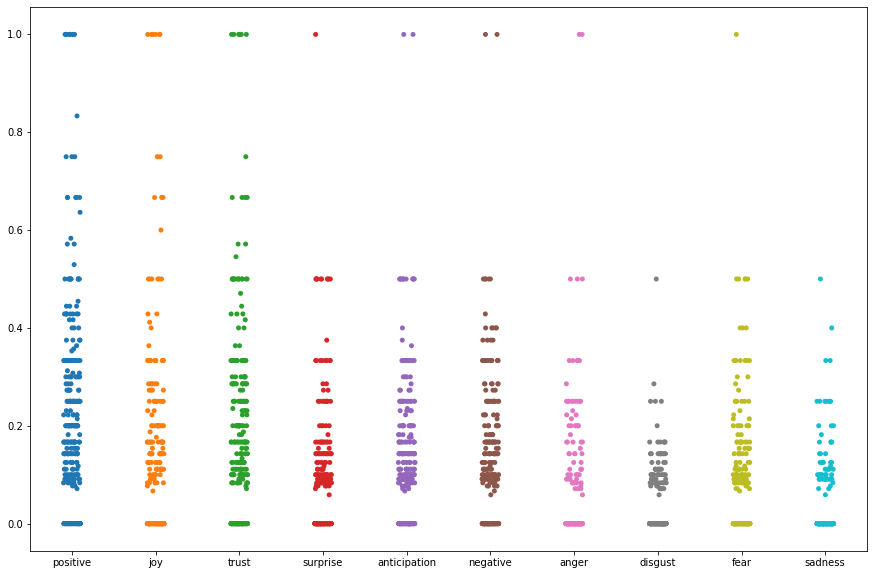

In [67]:
plt.figure(figsize=(15,10))
sns.stripplot(data = gnd_topic_3[emotions])
plt.show()

In [ ]:
def plot_trend(chart_title, sentiment_sdf, emotions, rolling_window=90):

    emotions = ["positive", "negative"]
    trend_pdf = sentiment_sdf[["created_at"] + emotions]
    trend_pdf = trend_pdf.sort_values(by = "created_at")
    
    fig, ax = plt.subplots(figsize=(25,10), sharex=True)
    fig.suptitle('{}'.format(chart_title))
    for emotion in emotions:
        rolling = trend_pdf[emotion].rolling(window=rolling_window).mean()
        ax.plot(trend_pdf.created_at, rolling, label=emotion)
    ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
gnd_data["created_at"] = pd.to_datetime(gnd_data["created_at"])
plot_trend("gnd emotions", gnd_data, emotions)